### Datasetの読み込み
MNIST Datasetを読み込む際には、以下のパラメータを使用します。
- root ：訓練/テストデータが格納されているパスを指定
- train ：訓練データまたはテストデータセットを指定
- download=True：root にデータが存在しない場合は、インターネットからデータをダウンロードを指定
- transform と target_transform：特徴量とラベルの変換を指定

In [4]:
%matplotlib inline

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=ToTensor()
)
# 一度保存したファイルを読み込む場合に、警告（エラー？？）が出る。

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
# 内容確認
print(len(training_data))
print(len(test_data))

60000
10000


### データセットの反復処理と可視化
Datasetの特定indexを指定する際には、リスト操作と同様に、training_data[index]と記載します。

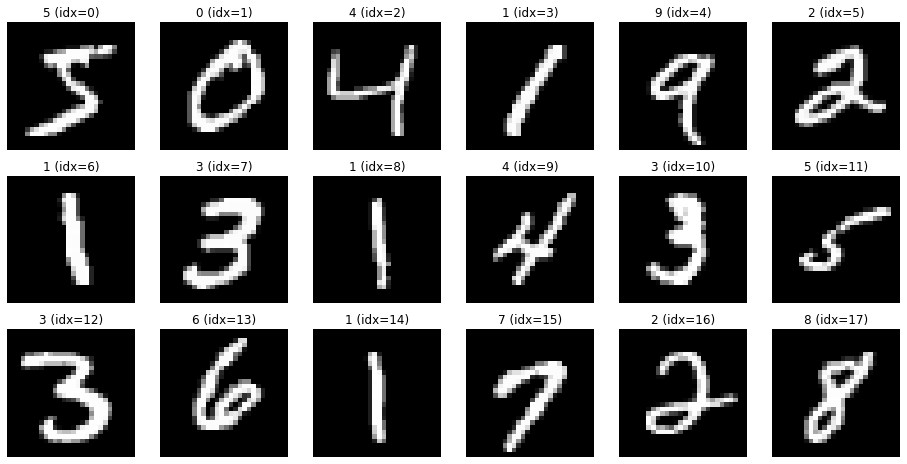

In [5]:
figure = plt.figure(figsize=(16, 8))
rows, cols = 3, 6
for i in range(rows * cols):
    img, label = training_data[i]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(str(label) + ' (idx=' + str(i) + ')')
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoaderの使用方法
DataLoaderは以下に示す複雑な処理を簡単に実行できるようにしてくれるAPIです。
- モデルの訓練時にはミニバッチ（"minibatches"）単位でデータを扱いたい。
- 各epochでのデータはシャッフルしたい。（訓練データへの過学習を防ぐ目的）
- Pythonの multiprocessingを使用し、複数データの取り出しを高速化したい。

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [13]:
# 内容確認
print(type(train_dataloader))
print(len(train_dataloader))
print(type(test_dataloader))
print(len(test_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>
938
<class 'torch.utils.data.dataloader.DataLoader'>
157
